In [49]:
from google.colab import drive
drive.mount('/content/drive/')
import os

# TODO: Fill in the Google Drive path where you uploaded
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['Copy of Welcome To Colaboratory', 'gooddf20000', 'baddf20000', 'gooddf30000', 'baddf30000', 'gooddf40000', 'baddf40000', 'gooddf50000', 'baddf50000', 'gooddf0', 'baddf0', 'baddf1', 'gooddf1', 'baddf2', 'gooddf2', 'gooddf3', 'baddf3', 'baddf4', 'gooddf4', 'baddf5', 'gooddf5', 'gooddf6', 'baddf6', 'gooddf7', 'baddf7', 'gooddf8', 'baddf8', 'gooddf9', 'baddf9', 'plots', 'gooddf1000', 'baddf1000', 'gooddf2000', 'baddf2000', 'gooddf3000', 'baddf3000', 'baddf4000', 'gooddf4000', 'baddf5000', 'gooddf5000', 'gooddf6000', 'baddf6000', 'gooddf7000', 'baddf7000', 'gooddf8000', 'baddf8000', 'gooddf9000', 'baddf9000', 'gooddf10000', 'baddf10000', 'MOCS_final_rand_init.ipynb', 'plotting.ipynb', 'baddf_prob1.0', 'gooddf_prob1.0', 'baddf_prob2.0', 'gooddf_prob2.0', 'baddf_prob3.0', 'gooddf_prob3.0', 'baddf_prob4.0', 'gooddf_prob4.0', 'baddf_prob5.0', 'gooddf_prob5.0', 'ba

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

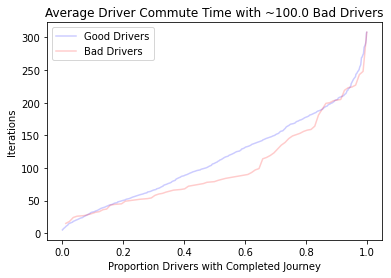

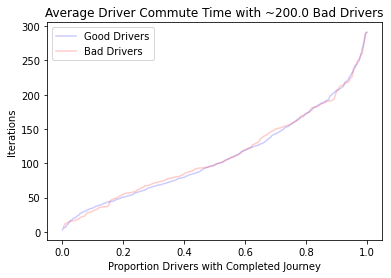

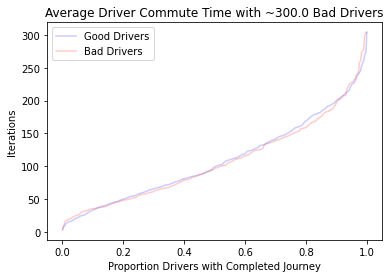

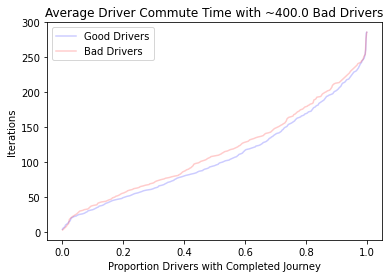

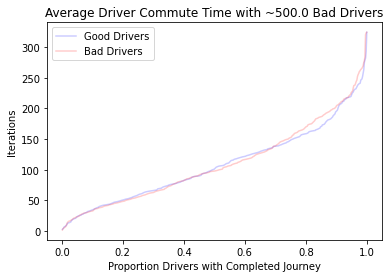

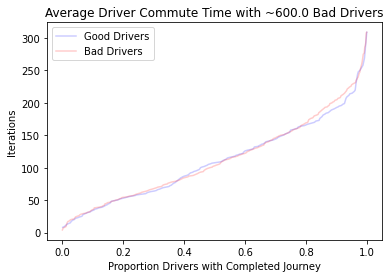

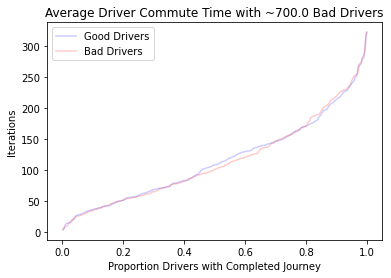

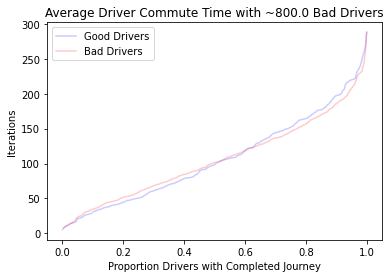

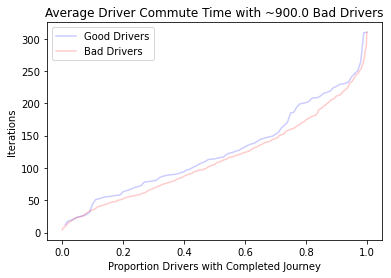

In [53]:
for i in range(1,10):
  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf{}'.format(i))
  bdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/baddf{}'.format(i))
  num_g = gdf.iloc[-1,0]
  num_b = bdf.iloc[-1,0]
  prop_g = [i / num_g for i in gdf.iloc[:,0]]
  prop_b = [i / num_b for i in bdf.iloc[:,0]]

  plt.plot(prop_g, gdf.iloc[:,1],
            label='Good Drivers',
            alpha=0.2,
            color='blue')
  plt.plot(prop_b, bdf.iloc[:,1],
            label='Bad Drivers',
            alpha=0.2,
            color='red')
  plt.xlabel('Proportion Drivers with Completed Journey')
  plt.ylabel('Iterations')
  plt.legend()
  plt.title('Average Driver Commute Time with ~{} Bad Drivers'.format(1000*(i)/10))
  plt.savefig(GOOGLE_DRIVE_PATH + '/plots/{}_plot.png'.format(1000*(i)/10))
  plt.show()



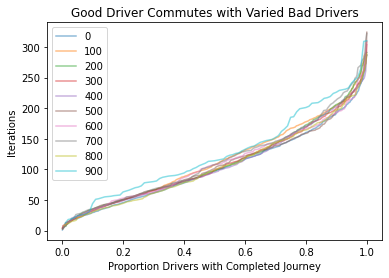

In [46]:
for i in range(10):
  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf{}'.format(i))
  num_g = gdf.iloc[-1,0]
  prop_g = [i / num_g for i in gdf.iloc[:,0]]

  plt.plot(prop_g, gdf.iloc[:,1],
            label=i*100,
            alpha=0.5)
plt.xlabel('Proportion Drivers with Completed Journey')
plt.ylabel('Iterations')
plt.legend()
plt.title('Good Driver Commutes with Varied Bad Drivers')
plt.savefig(GOOGLE_DRIVE_PATH + '/plots/good_drivers.png')
plt.show()

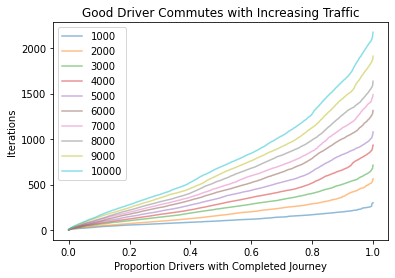

In [57]:
for i in range(10):
  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf{}'.format((i+1)*1000))
  num_g = gdf.iloc[-1,0]
  prop_g = [i / num_g for i in gdf.iloc[:,0]]

  plt.plot(prop_g, gdf.iloc[:,1],
            label=(i+1)*1000,
            alpha=0.5)
plt.xlabel('Proportion Drivers with Completed Journey')
plt.ylabel('Iterations')
plt.legend()
plt.title('Good Driver Commutes with Increasing Traffic')
plt.savefig(GOOGLE_DRIVE_PATH + '/plots/good_drivers_inc_drivers.png')
plt.show()

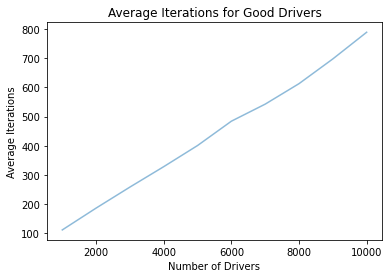

In [48]:
avs = []
for i in range(10):
  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf{}'.format((i+1)*1000))
  temp = [0] + list(gdf.iloc[:,0])
  num_finished = []
  for i in range(1, len(temp)):
    num_finished.append(temp[i] - temp[i-1])
  num_finished = np.array(num_finished)
  its = np.array(gdf.iloc[:,1])
  av_it = sum(num_finished * its) / sum(num_finished)
  avs.append(av_it)

plt.plot(np.arange(1000,10000+1,step=1000), avs, alpha=0.5)
plt.xlabel('Number of Drivers')
plt.ylabel('Average Iterations')
plt.title('Average Iterations for Good Drivers')
plt.savefig(GOOGLE_DRIVE_PATH + '/plots/inc_drivers.png')
plt.show()

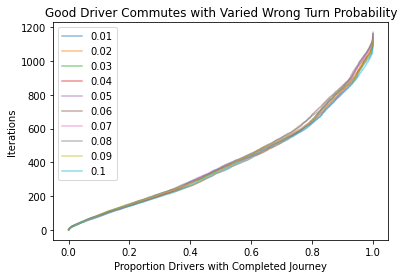

In [52]:
for i in range(1,11):

  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf_prob{}.0'.format(i))
  num_g = gdf.iloc[-1,0]
  prop_g = [j / num_g for j in gdf.iloc[:,0]]

  plt.plot(prop_g, gdf.iloc[:,1],
            label=i/100,
            alpha=0.5)
plt.xlabel('Proportion Drivers with Completed Journey')
plt.ylabel('Iterations')
plt.legend()
plt.title('Good Driver Commutes with Varied Wrong Turn Probability')
plt.savefig(GOOGLE_DRIVE_PATH + '/plots/good_drivers_vary_prob.png')
plt.show()

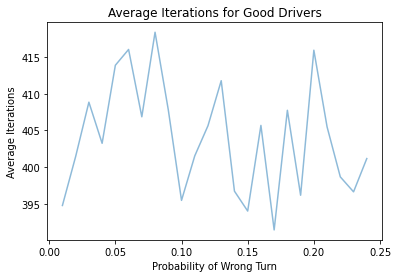

In [55]:
avs = []
for i in range(1,25):
  gdf = pd.read_csv(GOOGLE_DRIVE_PATH + '/gooddf_prob{}.0'.format(i))
  temp = [0] + list(gdf.iloc[:,0])
  num_finished = []
  for i in range(1, len(temp)):
    num_finished.append(temp[i] - temp[i-1])
  num_finished = np.array(num_finished)
  its = np.array(gdf.iloc[:,1])
  av_it = sum(num_finished * its) / sum(num_finished)
  avs.append(av_it)

plt.plot(np.arange(0.01,0.24+.01,step=.01), avs, alpha=0.5)
plt.xlabel('Probability of Wrong Turn')
plt.ylabel('Average Iterations')
plt.title('Average Iterations for Good Drivers')
plt.savefig(GOOGLE_DRIVE_PATH + '/plots/inc_prob.png')
plt.show()